In [46]:
from pymonntorch import *

from conex.behaviors.neurons import (
    LIF,
    ELIF,
    AELIF,
    SimpleDendriteStructure,
    SimpleDendriteComputation,
    InherentNoise
)

from conex.behaviors.synapses import (
    SimpleDendriticInput
)

from conex.behaviors.network import (
    TimeResolution
)

from conex import *

In [43]:
import matplotlib.pyplot as plt

In [72]:
class InputCurrent(Behavior) : 

    def initialize(self, ng) : 
        ng.I = ng.vector("normal({}, {})".format(self.parameter("mean", 40), self.parameter("std", 20)))        

In [116]:
net = Network(behavior=prioritize_behaviors([
    TimeResolution(),
]))

ng = NeuronGroup(net = net, size = 10, behavior={
    # 9 : InputCurrent(mean = 30, std = 15),
    10 : SimpleDendriteStructure(),
    11 : SimpleDendriteComputation(),
    12 : LIF(
        R = 1,
        threshold = -30,
        tau = 20,
        v_reset = -80,
        v_rest = -60,
    ),
    13:InherentNoise(scale = 7),
    14:Fire(),


    1000 : Recorder(["v", "I"]) 
})

In [117]:
net.initialize()
net.simulate_iterations(100)

Network['Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](10){10:SimpleDendriteStructure(Proximal_max_delay=1,Distal_max_delay=1,Apical_max_delay=None,proximal_min_delay=0,distal_min_delay=0,apical_min_delay=None,)11:SimpleDendriteComputation(I_tau=None,apical_provocativeness=None,distal_provocativeness=None,)12:LIF(R=1,tau=20,threshold=-30,v_reset=-80,v_rest=-60,init_v=None,init_s=None,)13:InherentNoise(mode=rand,scale=7,offset=0,)14:Fire()1000:Recorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=None,arg_0=['v', 'I'],)}
100xBatch: 1/1 (100%) 79.786ms


79.78606224060059

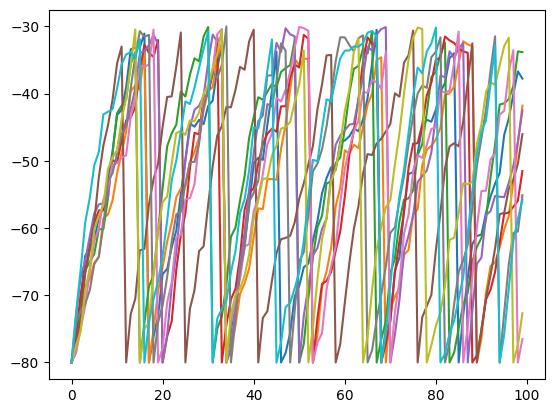

In [118]:
plt.plot(net["v", 0])
plt.show()